In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from astropy import units as u
from astropy.coordinates import SkyCoord

from dblinea import DBBase

%reload_ext autoreload
%autoreload 2

In [26]:
dados = pd.read_csv("NGC1344.csv")

In [10]:
def estrelas_no_dr2(dados):
    plt.figure(figsize=[10,5], dpi=300)
    plt.suptitle("Estrelas no DR2", fontsize=14)
    plt.subplot(1,2,1)
    plt.plot(dados.ra, dados.dec, 'k.', alpha=0.1)
    plt.xlabel("R.A. (deg)", fontsize=14)
    plt.ylabel("Dec. (deg)", fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.tight_layout()

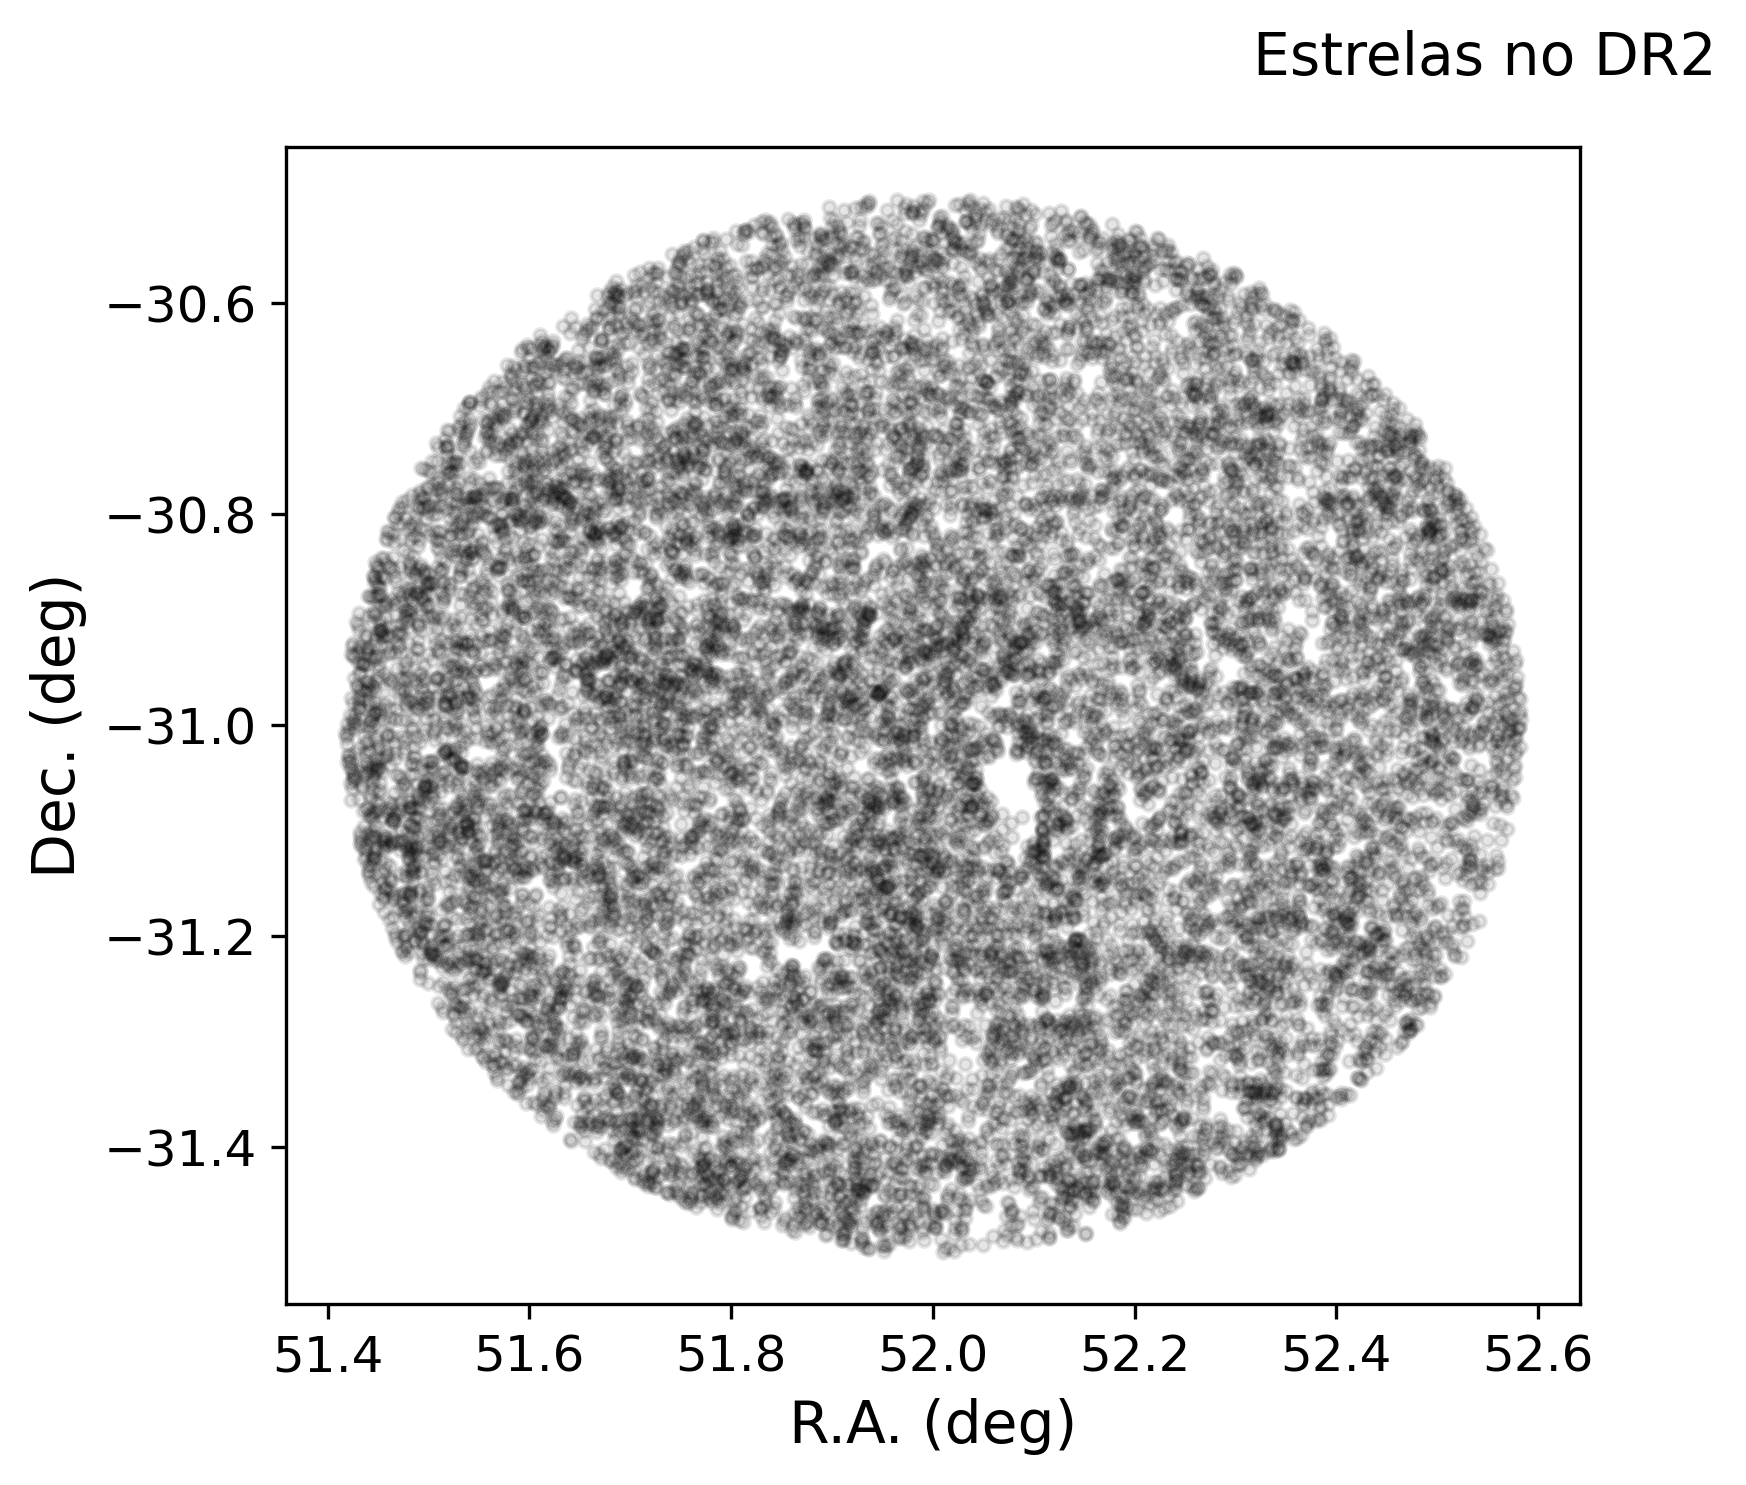

In [11]:
estrelas_no_dr2(dados)


CPU times: user 175 ms, sys: 151 ms, total: 326 ms
Wall time: 146 ms


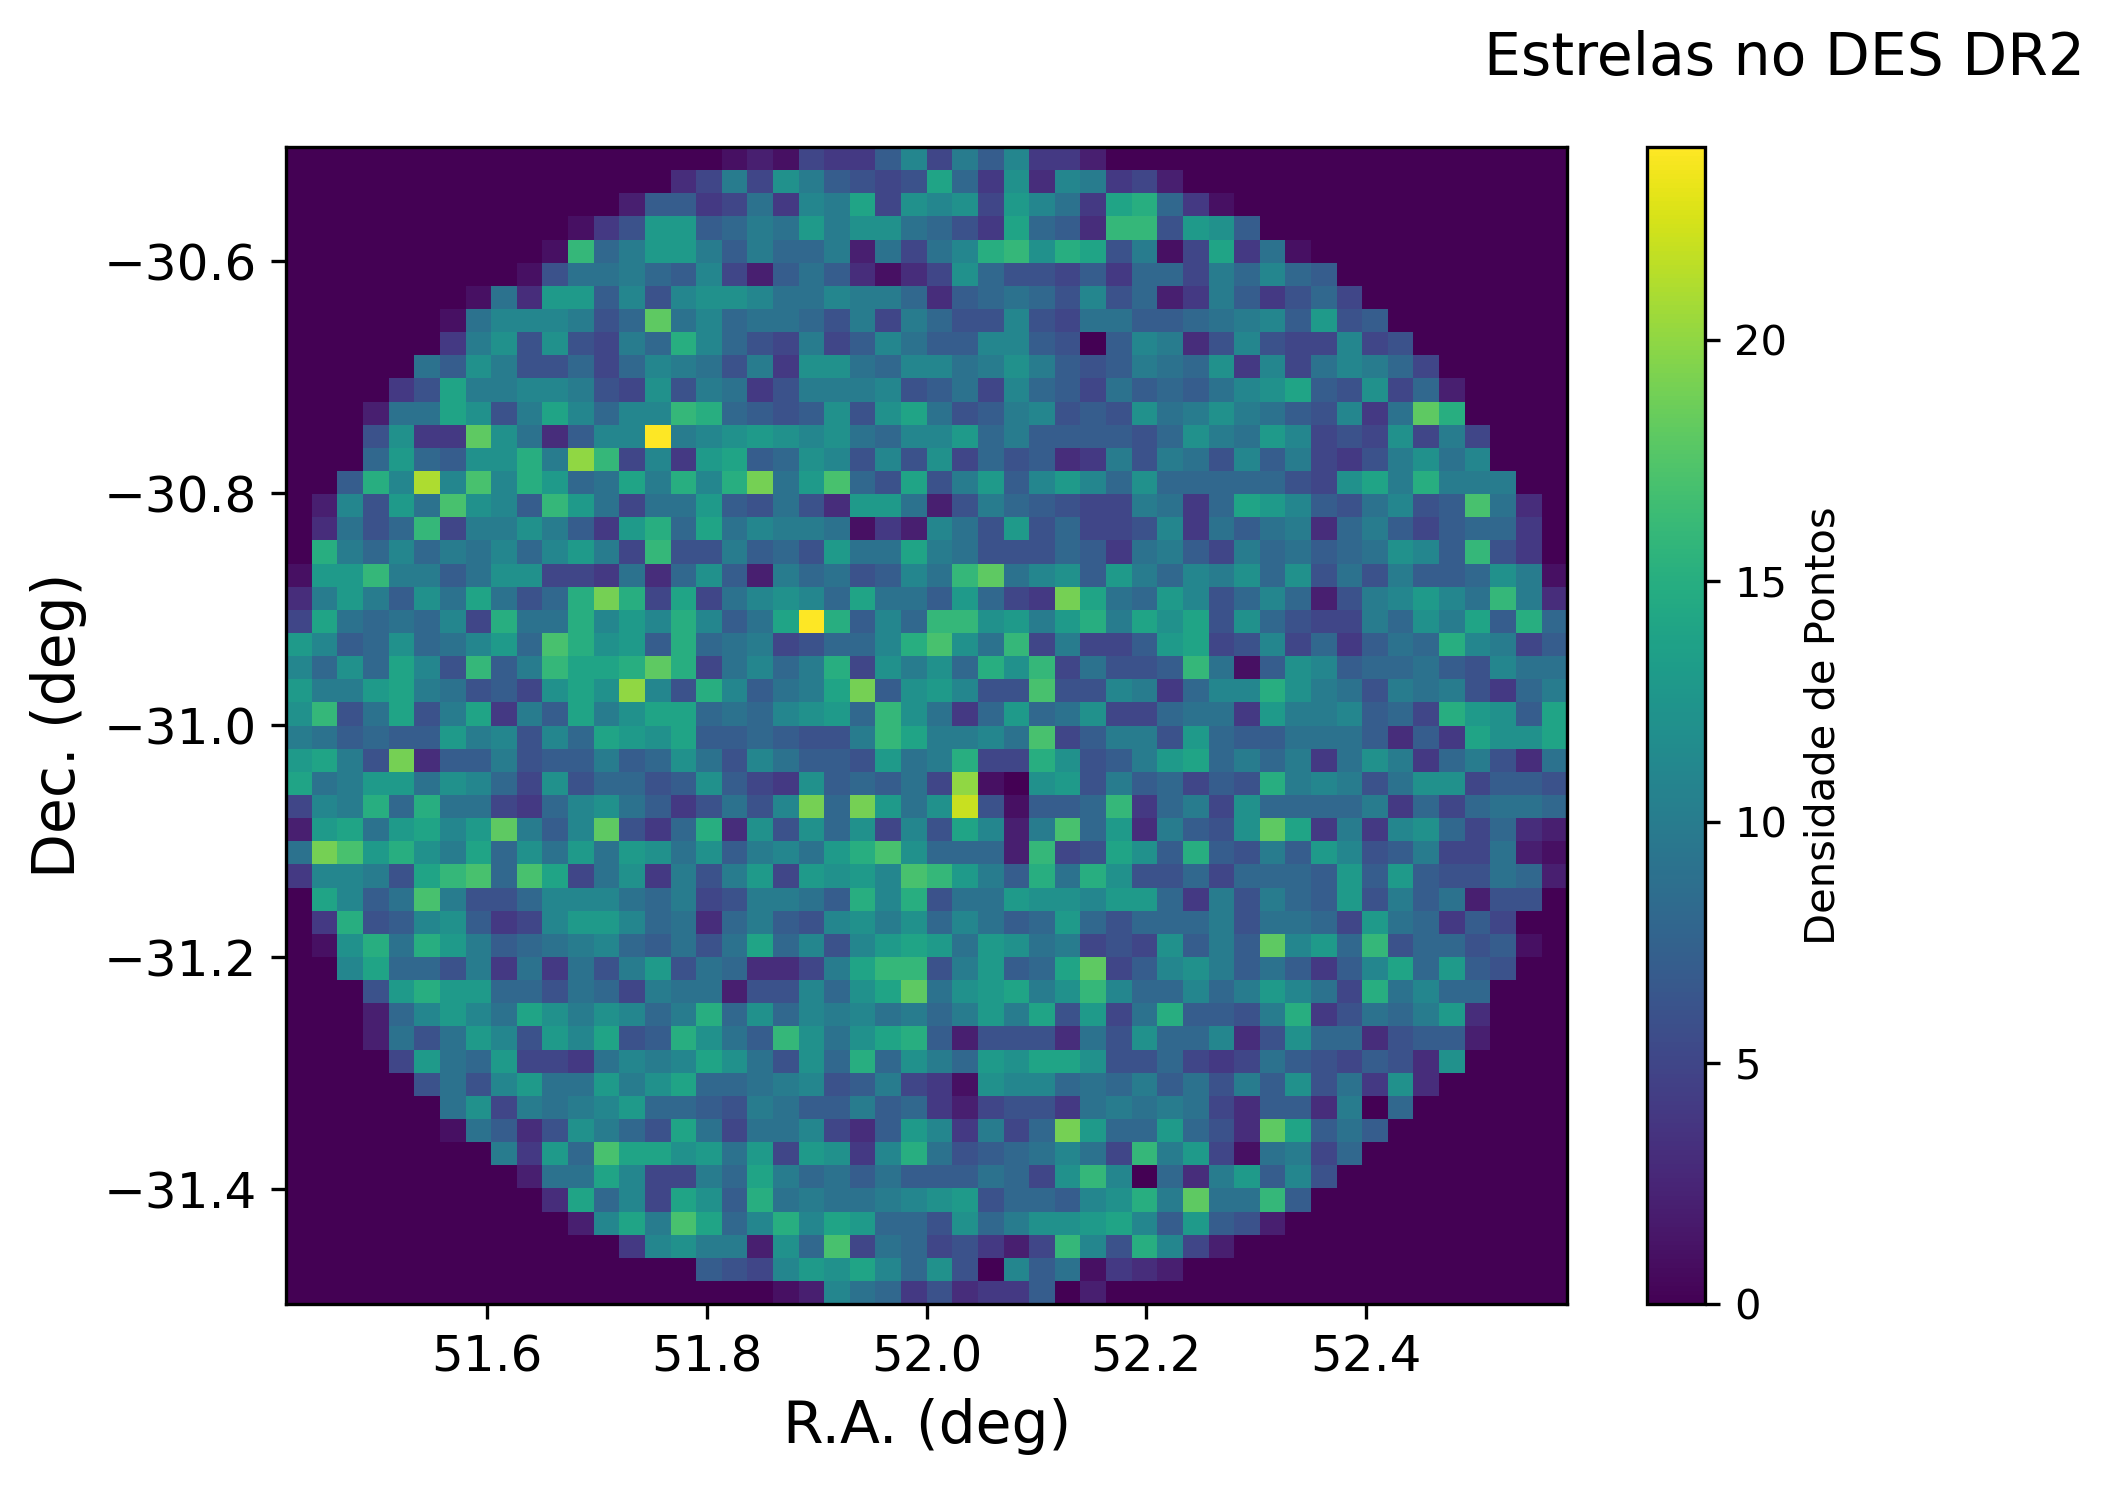

In [5]:
%%time
plt.figure(figsize=[12,5], dpi=300)
plt.suptitle("Estrelas no DES DR2", fontsize=14)
plt.subplot(1,2,1)
plt.hist2d(dados.ra, dados.dec, bins=50)
plt.xlabel("R.A. (deg)", fontsize=14)
plt.ylabel("Dec. (deg)", fontsize=14)
plt.colorbar(label="Densidade de Pontos")
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()

In [24]:
def criar_cmd(dados):
    new_columns = {"coadd_object_id": "object_id",
           "mag_auto_g_dered": "mag_g",
           "mag_auto_r_dered": "mag_r",
           "mag_auto_i_dered": "mag_i",
           "magerr_auto_g": "err_g", 
           "magerr_auto_r": "err_r", 
           "magerr_auto_i": "err_i"}
    dados.rename(columns=new_columns, inplace=True)
    dados["gmr"] = dados.mag_g - dados.mag_r
    dados.query("flags_g < 4  & mag_g != 99. & mag_r != 99. & mag_i != 99. ", inplace=True)
    plt.figure(figsize=[7,5])
    plt.title("CMD - Estrelas no DES DR2", fontsize=14)
    plt.hexbin(dados.gmr, dados.mag_r, gridsize=500, bins='log') #Essa linha cria um gráfico hexbin usando Matplotlib, 
    #que é particularmente útil para visualizar a densidade de pontos de dados em um espaço bidimensional.
    plt.xlabel("$g - r$", fontsize=14)
    plt.ylabel("$g$", fontsize=14)
    plt.colorbar(label="Densidade de Pontos")
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.xlim(-1.5,2.5)
    plt.ylim(24,16)
    plt.tight_layout()


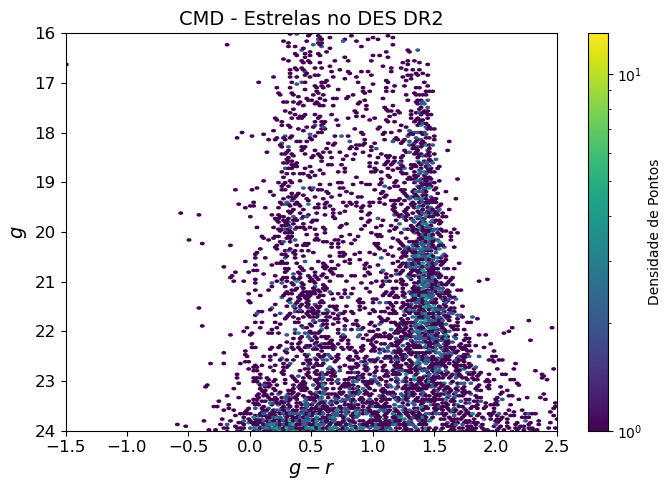

In [27]:
criar_cmd(dados)

In [13]:
dados_menor = pd.read_csv("NGC1344-menor.csv")

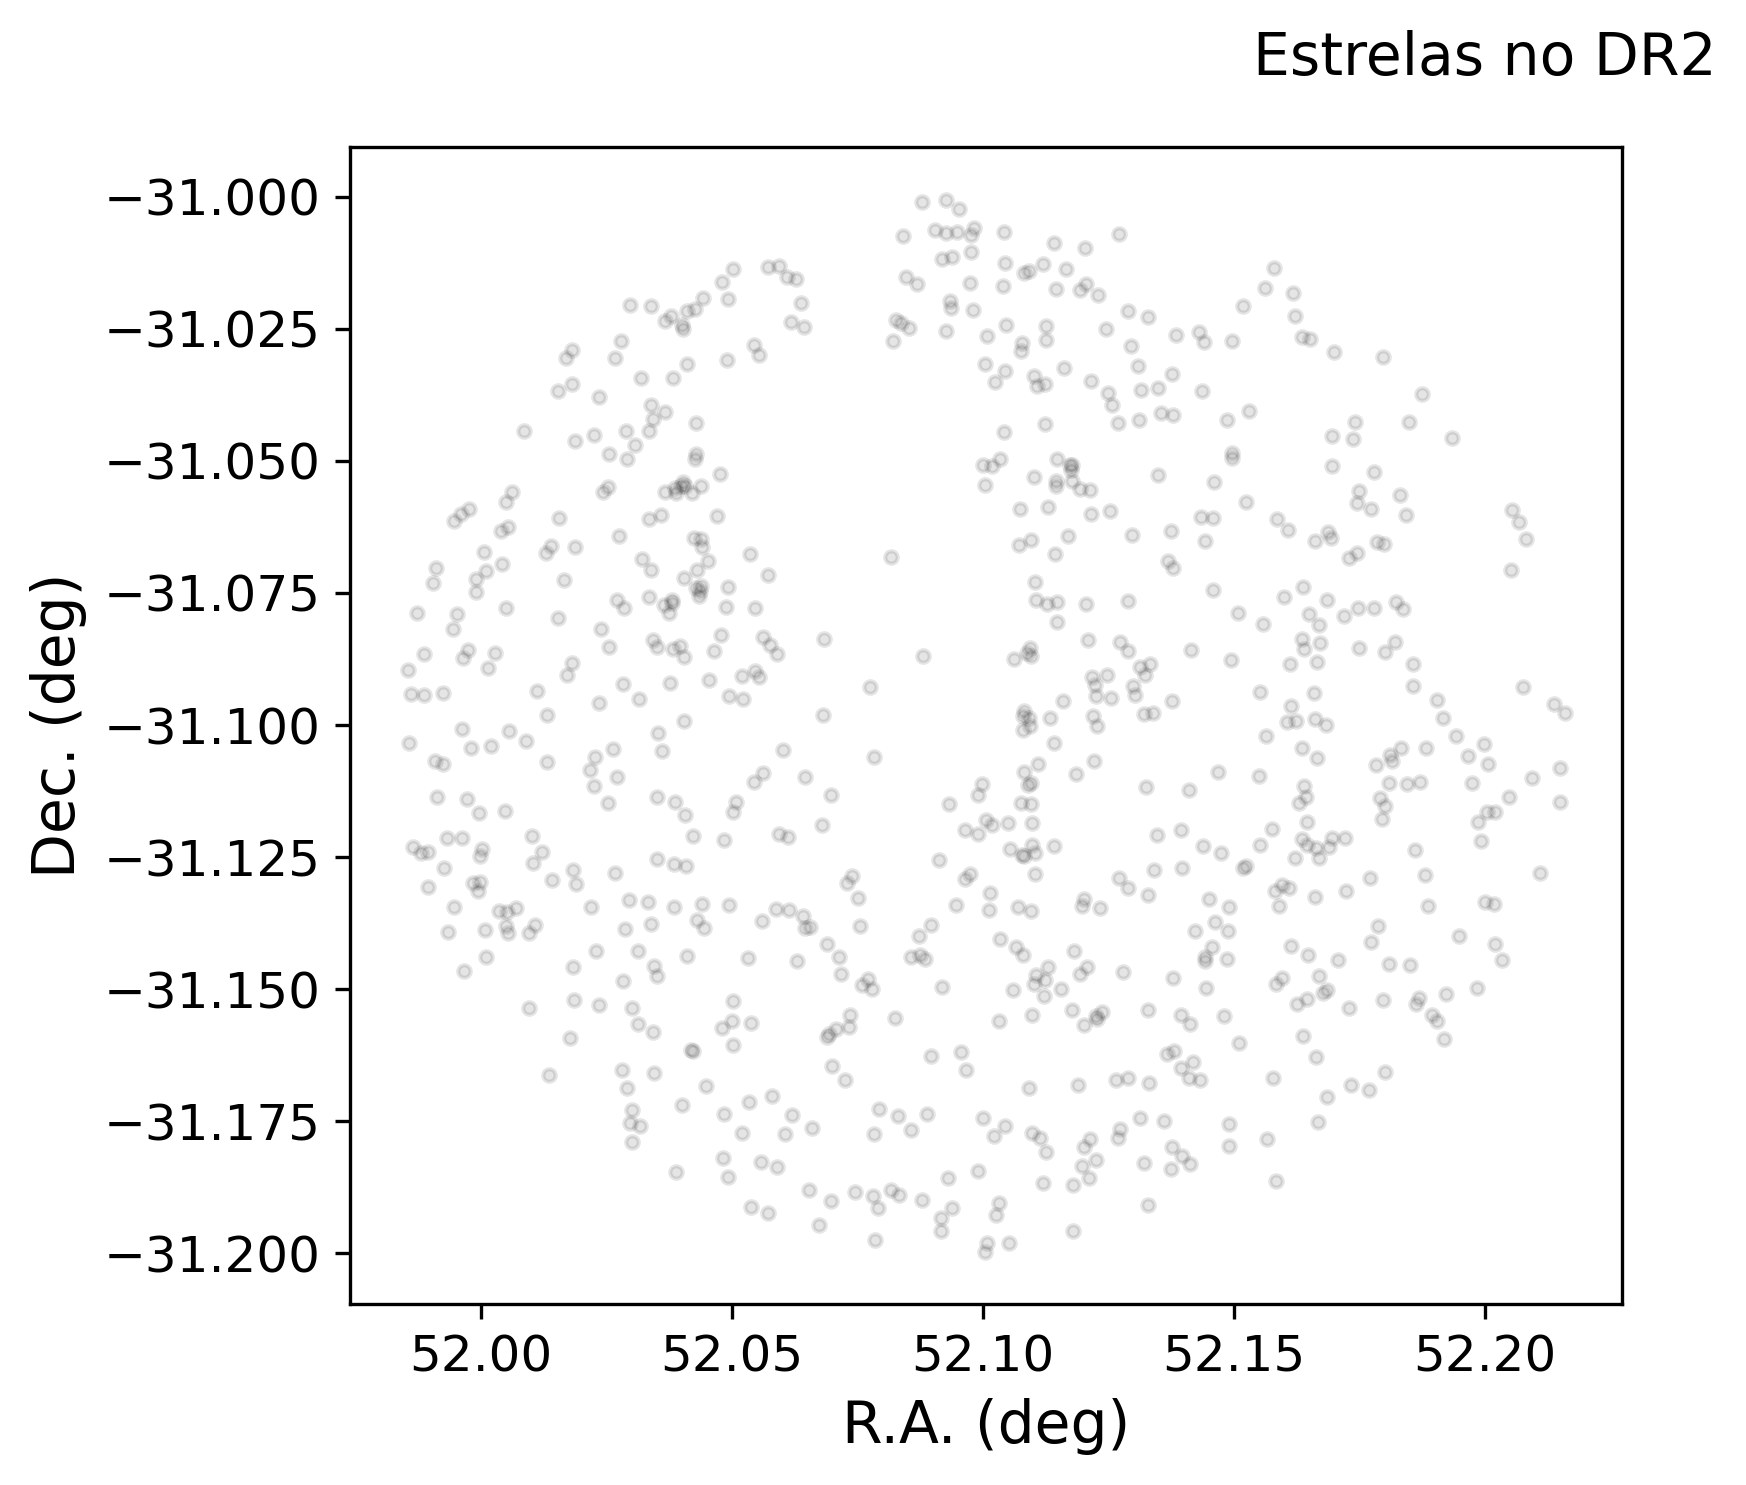

In [14]:
estrelas_no_dr2(dados_menor)

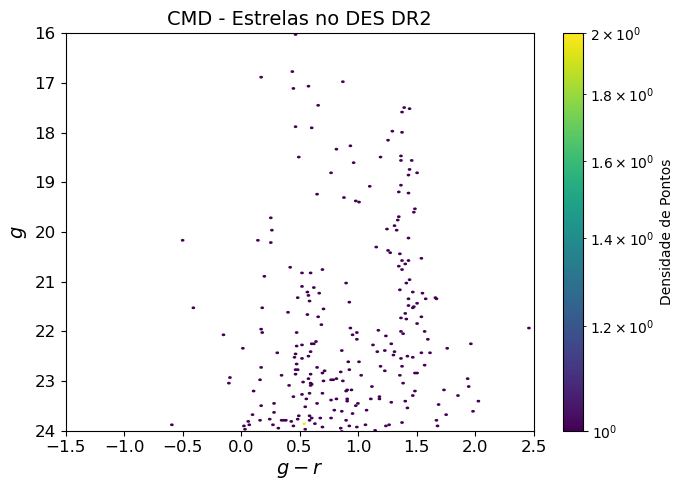

In [28]:
criar_cmd(dados_menor)